# OSM network from a bounding box

Use a bounding box to create a `networkx` graph from OpenStreetMap data.


In [1]:
from shapely import geometry

from cityseer.tools import io, plot

Use a shapely Polygon in WGS84 coordinates to define a boundary for the graph.


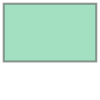

In [2]:
poly_wgs = geometry.box(
    -0.14115725966109327, 51.509220662095714, -0.12676440185383622, 51.51820111033659
)
poly_wgs

Use the [osm_graph_from_poly](https://cityseer.benchmarkurbanism.com/tools/io#osm-graph-from-poly) function available from the `cityseer` package's `io` module.

The function expects a `shapely` polygon and returns a `networkx` graph. `cityseer` will automatically extract the graph topology while also creating accurate street geometries represented as `shapely` LineString geometries, which are linked to the graph's edges through the `geom` edge attribute.


In [3]:
G = io.osm_graph_from_poly(poly_wgs)
print(G)

INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
INFO:cityseer.tools.io:Converting networkX graph to CRS code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating 

MultiGraph with 382 nodes and 591 edges


The [`plot_nx`](https://cityseer.benchmarkurbanism.com/tools/plot#plot-nx) function can be used to visualize the graph. It accepts a `cityseer` prepared `networkx` graph and will plot street geometries when the `plot_geoms` parameter is set to `True`.


INFO:cityseer.tools.plot:Preparing graph nodes
INFO:cityseer.tools.plot:Preparing graph edges


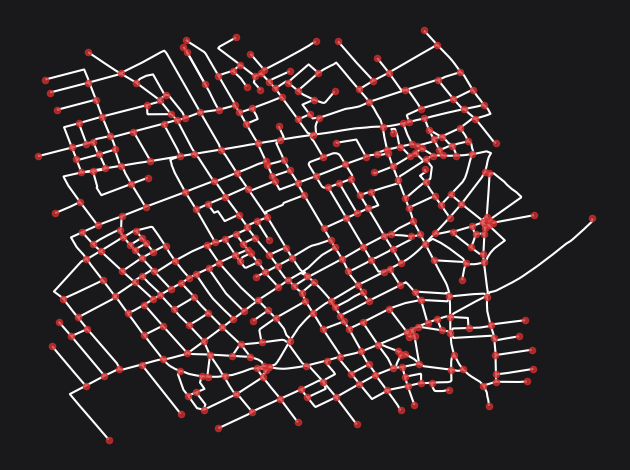

In [4]:
plot.plot_nx(G, plot_geoms=True)

If using a different CRS, then specify this using the `poly_crs_code` parameter. For example, if you are using UTM zone 30N, then set this to the corresponding EPSG code, in this case [32630](https://epsg.io/32630).


INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
INFO:cityseer.tools.io:Converting networkX graph to CRS code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating 

MultiGraph with 381 nodes and 595 edges


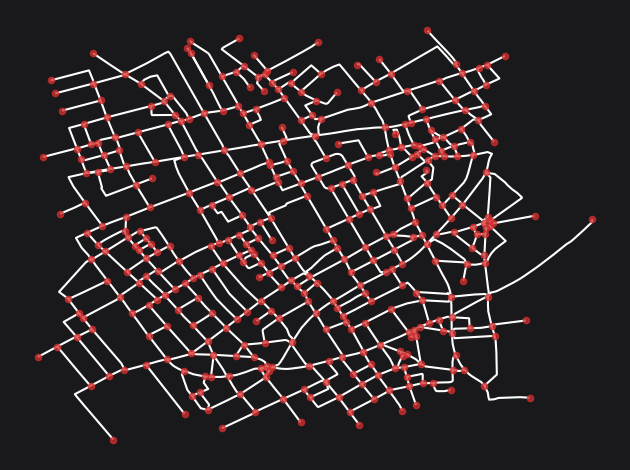

In [5]:
poly_utm = geometry.box(698361, 5710348, 699361, 5711348)
G_utm = io.osm_graph_from_poly(poly_utm, poly_crs_code=32630)
print(G_utm)
plot.plot_nx(G_utm, plot_geoms=True)

`cityseer` will set node and edge geometry coordinates to the local projected UTM coordinate reference system. If you want to create the resulting graph in a specific CRS, then specify this using the `to_crs_code` parameter. For example, in the UK you might want to use the British National Grid, which has the EPSG code [27700](https://epsg.io/27700).


INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
INFO:cityseer.tools.io:Converting networkX graph to CRS code 27700.
INFO:cityseer.tools.io:Processing node x, y coordinates.
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating 

MultiGraph with 380 nodes and 589 edges


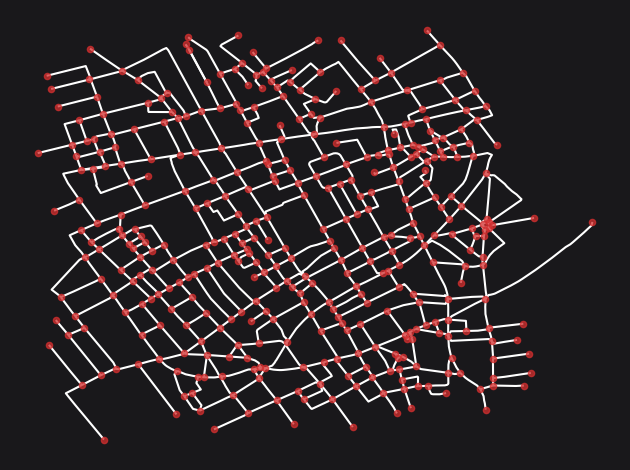

In [6]:
G_bng = io.osm_graph_from_poly(poly_wgs, to_crs_code=27700)
print(G_bng)
plot.plot_nx(G_bng, plot_geoms=True)

`cityseer` will automatically attempt to clean-up the graph by removing unnecessary nodes and simplifying the graph. If you only want basic cleaning without simplification, then set the `simplify` parameter to `False`. Note that in this case the graph has significantly more nodes and edges because simplification has not been applied.


INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
INFO:cityseer.tools.io:Converting networkX graph to CRS code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.plot:Preparing graph nodes
INFO:cityseer.tools.plot:Preparing graph edges


MultiGraph with 1913 nodes and 2211 edges


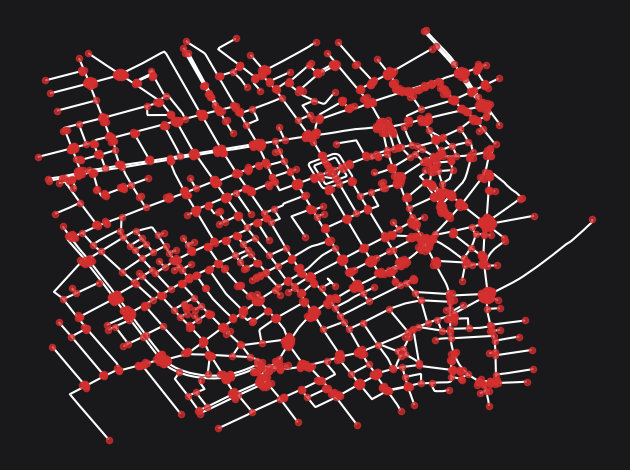

In [7]:
G_raw = io.osm_graph_from_poly(poly_wgs, simplify=False)
print(G_raw)
plot.plot_nx(G_raw, plot_geoms=True)